<a href="https://colab.research.google.com/github/Kumarisimran626/S.K-Bike-Sharing-Demand-Prediction-Capstone-Project/blob/main/S_K_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Project-Title : Seoul Bike Sharing Demand Prediction</u></b>


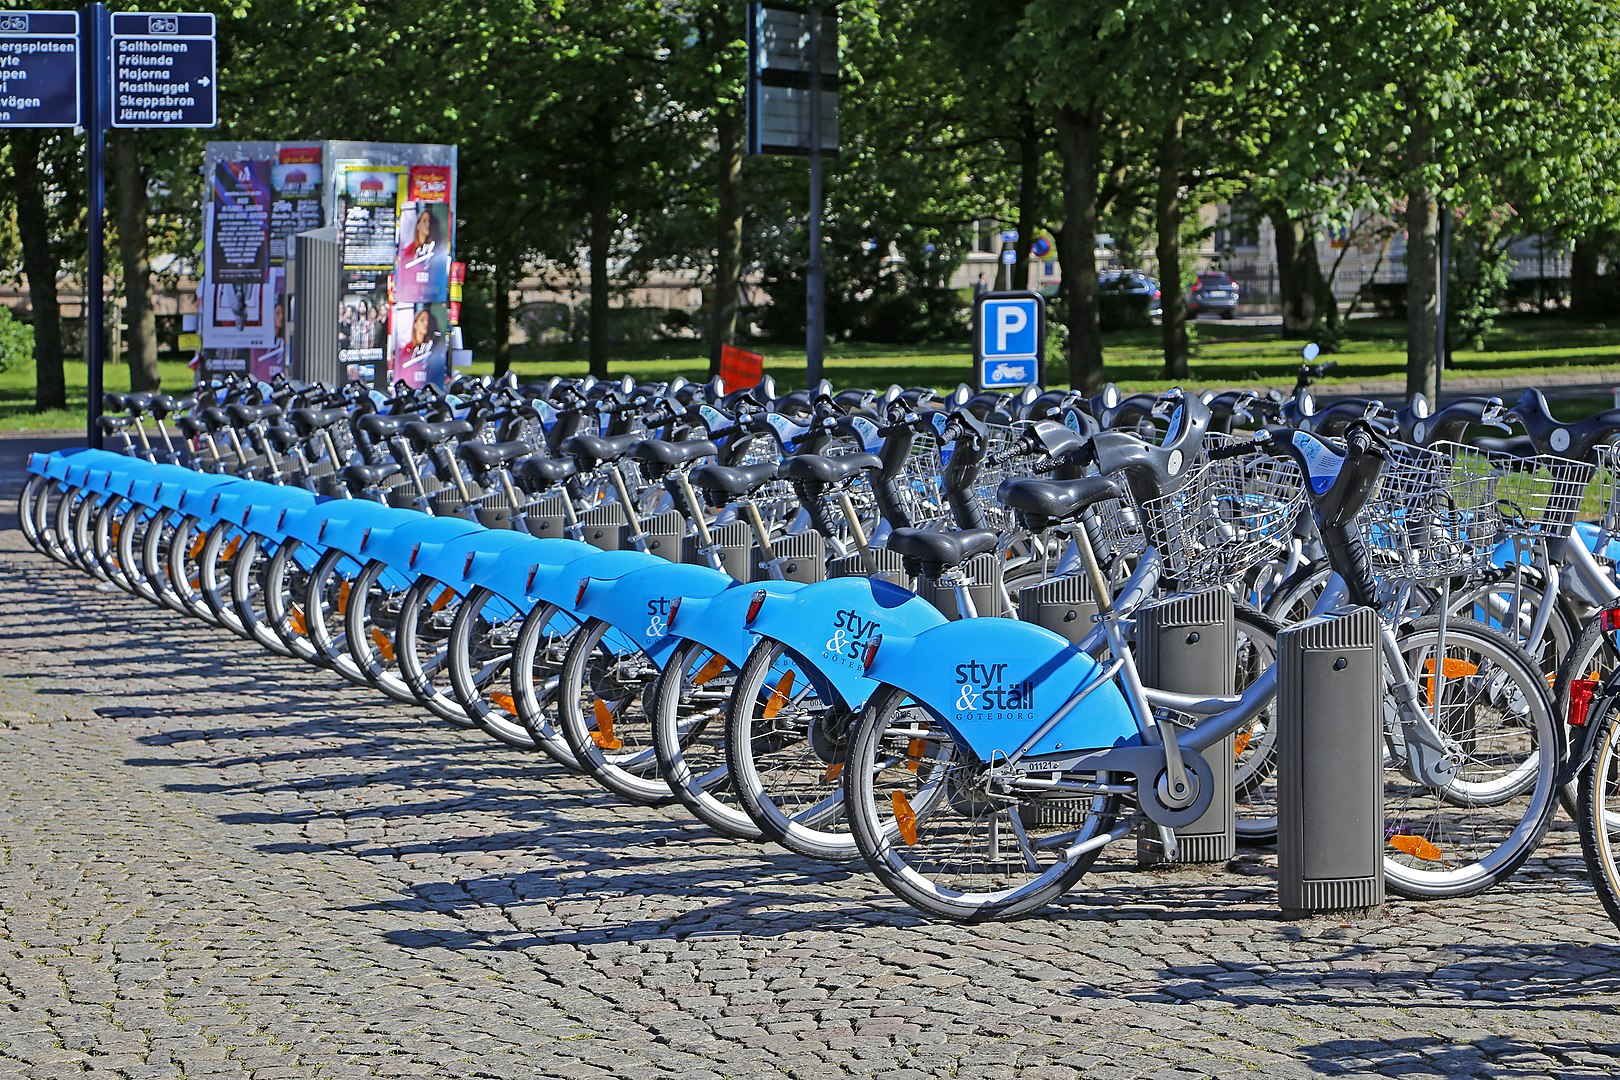

#<b/>Project Type - Regression</b>


#<b/>Contribution - Individual
###Name - Simran Kumari</b>

#<b/>Project Summary -</b>

# **GitHub Link**

# **<u>Problem Description</u>**
# Currently the rental bikes are introduced in many urban cities for the enhancement of moblility comfort. It is important to make the rental bikes available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **Data Description**

##**The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.**

#<b>Attribute Information :</b>


 *  ## Date : year-month-day

 * ## Rented Bike count - Count of bikes rented at each hour

* ## Hour - Hour of he day

* ## Temperature-Temperature in Celsius

* ## Humidity - %

* ## Windspeed - m/s

* ## Visibility - 10m


* ## Dew point temperature - Celsius

* ## Solar radiation - MJ/m2

* ## Rainfall - mm

* ## Snowfall - cm

* ## Seasons - Winter, Spring, Summer, Autumn
* ## Holiday - Holiday/No holiday

* ## Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


   




# <b> <u>Importing Essential libraries</u></b>


In [3]:
# Importing Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

##<b> <u>Mount Drive, Giving.csv file location and Reading the .csv file</b></u>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Bike_df = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv', encoding = 'latin')

# <b>Exploring and Understanding more about data</b>
* ## The data set contains 8760 rows and 14 columns.

In [6]:
# Using .shape to find the total number of rows and columns
Bike_df.shape

(8760, 14)

In [7]:
# Using .head(5) to find top 5 rows
Bike_df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
## Using .tail(5) to find below 5 rows
Bike_df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
# Viewing the description of data in dataframe
Bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000



***In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.***

In [10]:
# Getting all the columns
print("Features of dataset")
Bike_df.columns

Features of dataset


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

# Let us try to understand the meaning of all columns of the dataframe.For this we will use .unique() to see the unique values attained by each column.

In [11]:
# Viewing the unique value
Bike_df.nunique()


Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [12]:
 #check details about the data set
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

##**Features description:-**

Date : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

Rented Bike Count : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

Hour: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

Temperature(°C) : Temperature in Celsius, type : Float

Humidity(%) : Humidity in the air in %, type : int

Wind speed (m/s) : Speed of the wind in m/s, type : Float

Visibility (10m) : Visibility in m, type : int

Dew point temperature(°C) : Temperature at the beggining of the day, type : Float

Solar Radiation (MJ/m2) : Sun contribution, type : Float

Rainfall(mm) : Amount of raining in mm, type : Float

Snowfall (cm) : Amount of snowing in cm, type : Float

Seasons : Season of the year, type : str, there are only 4 season's in data .

Holiday : If the day is holiday period or not, type : str

Functioning Day : If the day is a Functioning Day or not, type : str

# **Preprocessing the dataset**

## Steps of data processing
1. Deal with null/missing values
2. Deal with duplicate data
3. Deal with outliers

# **1.Handling  null values/ missing values.**

In [13]:
# Checking there have null/ missing values in each column.
Bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [14]:
# Here we seeing the column names, datatype of features, null values, unique values,  and their number of unique values.
df_columns_table=[[name,Bike_df[name].dtypes,Bike_df[name].isnull().sum(),round(Bike_df[name].isnull().sum()/len(Bike_df)*100, 2),
                   Bike_df[name].nunique(),Bike_df[name].unique()] for name in Bike_df.columns]
df_columns = pd.DataFrame(df_columns_table, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
df_columns

,Column,Dtype,Null,Null (%),nUnique,Unique
0,Date,object,0,0.0,365,"[01/12/2017, 02/12/2017, 03/12/2017, 04/12/201..."
1,Rented Bike Count,int64,0,0.0,2166,"[254, 204, 173, 107, 78, 100, 181, 460, 930, 4..."
2,Hour,int64,0,0.0,24,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,Temperature(°C),float64,0,0.0,546,"[-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7...."
4,Humidity(%),int64,0,0.0,90,"[37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2..."
5,Wind speed (m/s),float64,0,0.0,65,"[2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ..."
6,Visibility (10m),int64,0,0.0,1789,"[2000, 1928, 1996, 1936, 793, 1913, 1687, 1380..."
7,Dew point temperature(°C),float64,0,0.0,556,"[-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19..."
8,Solar Radiation (MJ/m2),float64,0,0.0,345,"[0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01..."
9,Rainfall(mm),float64,0,0.0,61,"[0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ..."


<Axes: >

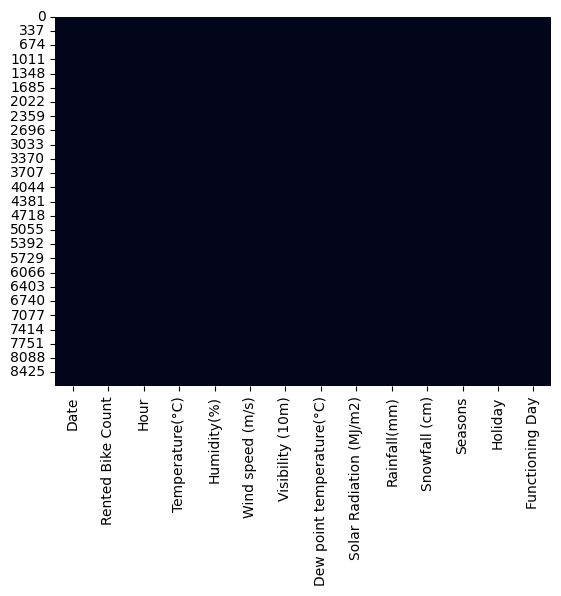

In [15]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(Bike_df.isnull(), cbar=False)

# **Missing Values **

**Why do we need to handle missing values?**
* ***The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first***

# **No null or missing values in the dataset **

# **2.Handling Duplicate Values**



**Why is it important to remove duplicate records from my data?**
* ***"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.***

In [16]:
duplicate_value=len(Bike_df[Bike_df.duplicated()])
print("The number of duplicate values in the dataset is = ",duplicate_value)

The number of duplicate values in the dataset is =  0


* No duplicate data is present in dataset

##Changing column name

In [17]:
#Rename the complex columns name
Bike_df=Bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

##Breaking date column

* ***Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.***

In [18]:
# Changing the "Date" column into three "year","month","day" column
Bike_df['Date'] = Bike_df['Date'].apply(lambda x:
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [19]:
Bike_df['year'] = Bike_df['Date'].dt.year
Bike_df['month'] = Bike_df['Date'].dt.month
Bike_df['day'] = Bike_df['Date'].dt.day_name()

In [20]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
Bike_df['weekdays_weekend']=Bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
Bike_df=Bike_df.drop(columns=['Date','day','year'],axis=1)

* ***So we convert the "date" column into 3 different column i.e "year","month","day".***
* ***The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it***.
* ***The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column***.

In [21]:
Bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [22]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [23]:
Bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

In [24]:

# Lets take care of the categorical features
categorical_features = [i for i in Bike_df.columns if i not in Bike_df.describe().columns]
categorical_features

['Seasons', 'Holiday', 'Functioning_Day']

In [ ]:
# Converting the column  to categorical type.
col=['Hour','month','weekdays_weekend']
for col in col:
  Bike_df[col]=Bike_df[col].astype('category')

## **3. Deal with outliers**

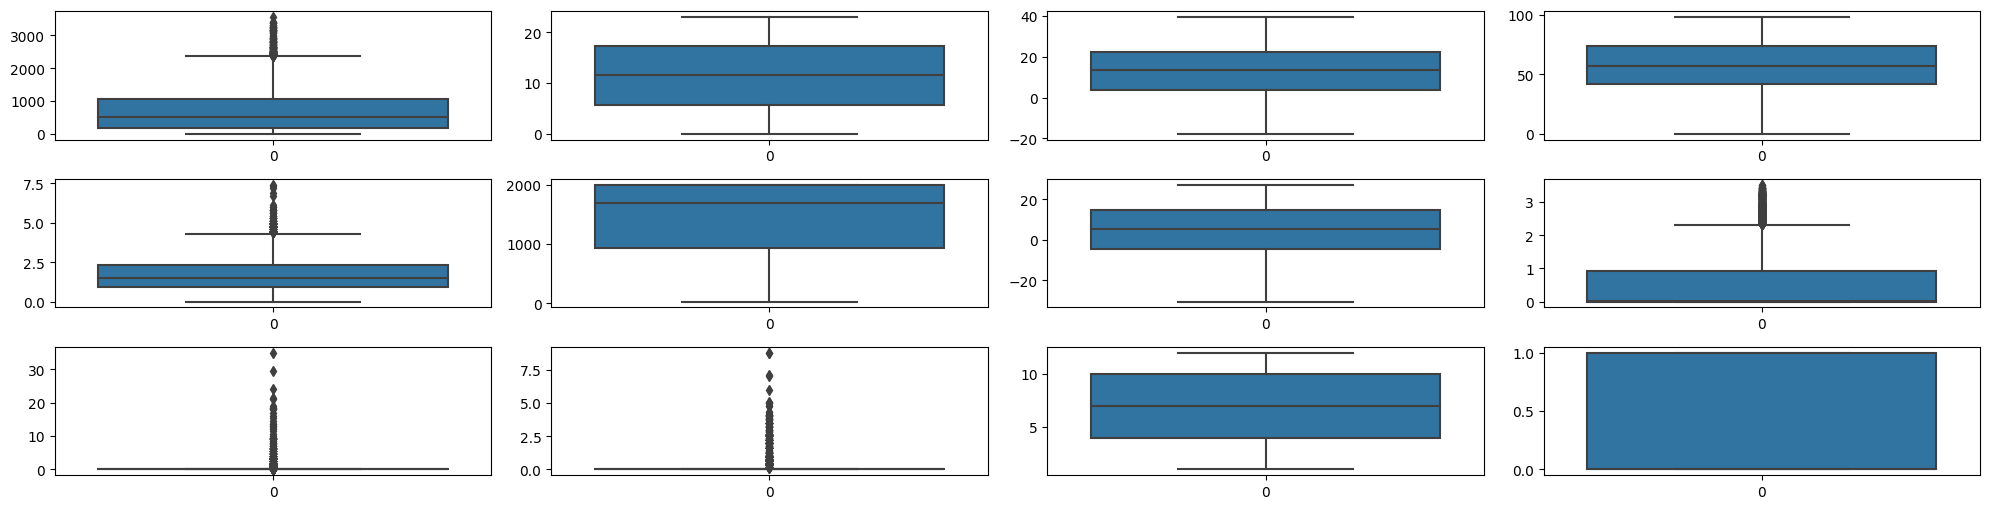

In [26]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1

for col in Bike_df.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(Bike_df[col])
    num_it+=1

plt.tight_layout()

* **Rented Bike count** contains **outliers.**
* Wind Speed, Solar Radiation, Rainfall, and Snowfall contains outlier values which are acceptable.

#**Feature Engineering**

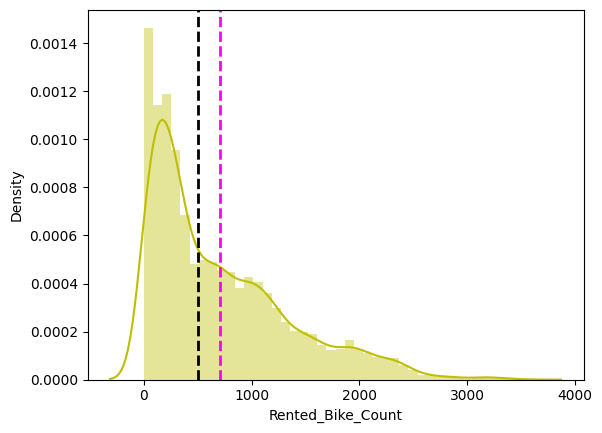

In [27]:
# Rented bike count (target variable) distribution graph using  seaborn
ax= sns.distplot(Bike_df['Rented_Bike_Count'],hist=True,color='y')
ax.axvline(Bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(Bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.

* Rented bike count column follow right tail distribution.



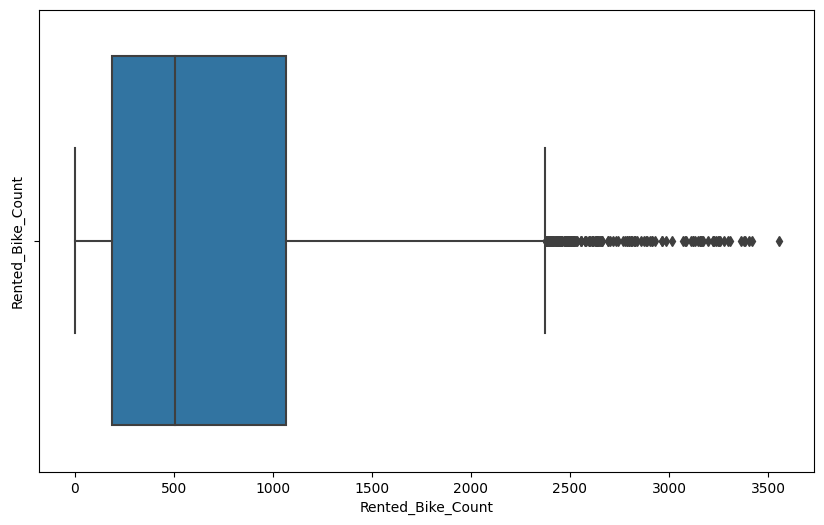

In [28]:
# Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=Bike_df['Rented_Bike_Count'])
plt.show()

##**Normalizing Rented_Bike_Count column data**

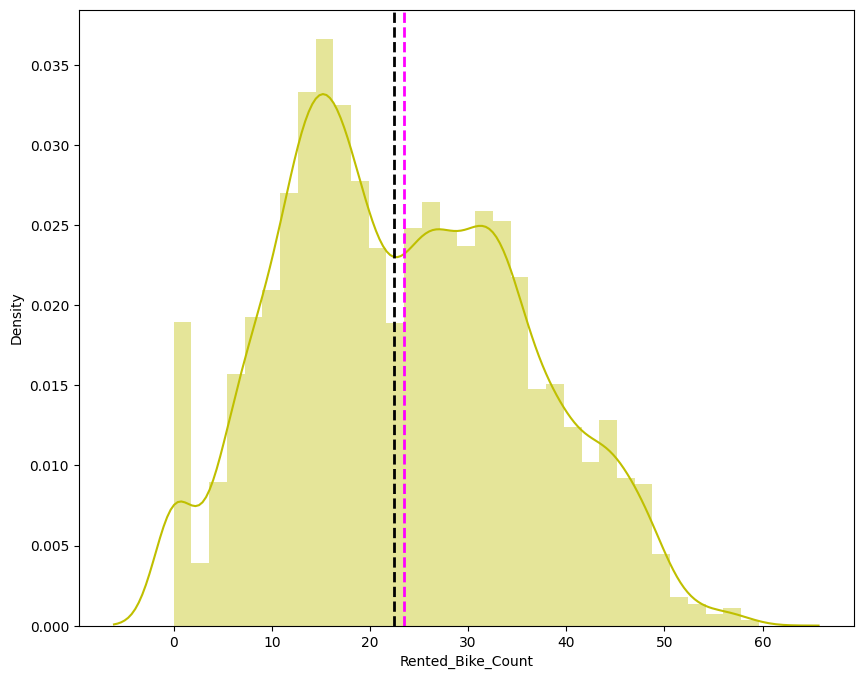

In [29]:
# square_root transformation

plt.figure(figsize=(10,8))
ax=sns.distplot(np.sqrt(Bike_df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(Bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(Bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

 Since we have generic rule of applying Square root for the skewed variable in order to make it normal .taking the square root of the 'Rented_Bike_Count' variable we transform the data to make it more approximately follow a normal distribution.

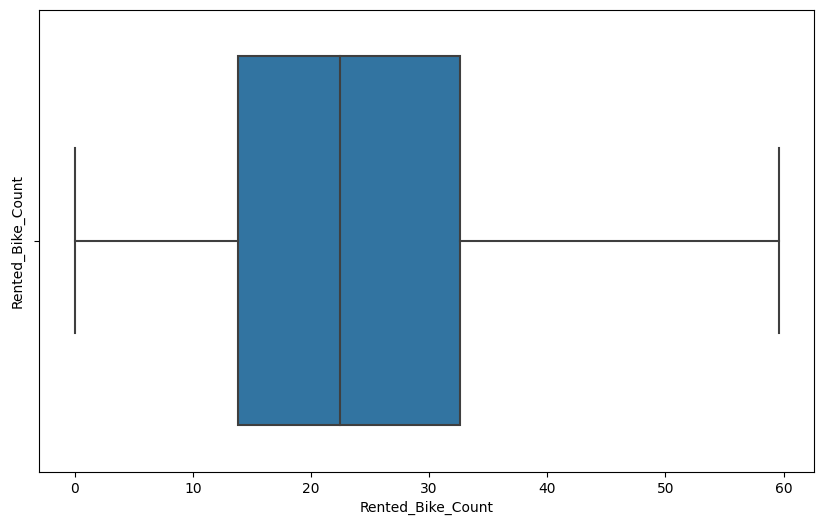

In [30]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(Bike_df['Rented_Bike_Count']))
plt.show()

* **after doing squareroot of Rented Bike Count no outliers detected**

# **Expoatory Data Analysis**

Exploratory data analysis is a statistical approach to data comprehension that is typically carried out visually. Exploratory data analysis graphs are plotted to help the analyst understand the data.

## **Univariate Analysis**

**Why do you do univariate analysis?**
* ***The key objective of Univariate analysis is to simply describe the data to find patterns within the data.***

##**Analysation of categorical variables**

# **Rented bike count over different seasons**

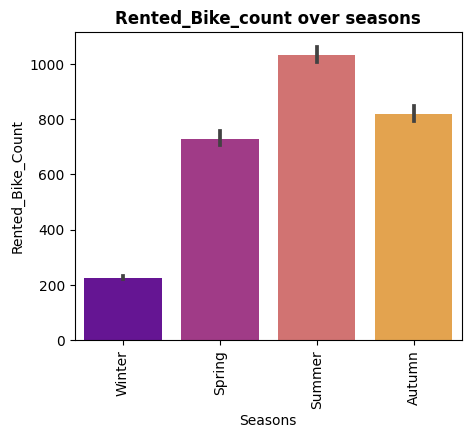

In [31]:
# Bike Count Over Seasons(bar_plot)
plt.figure(figsize=(5,4))
plt.title('Rented_Bike_count over seasons',fontweight = 'bold')
sns.barplot(data = Bike_df, x='Seasons', y = 'Rented_Bike_Count', palette ='plasma')
plt.xticks(rotation='vertical')
plt.show()

**In summer season rented bike count is higher.**

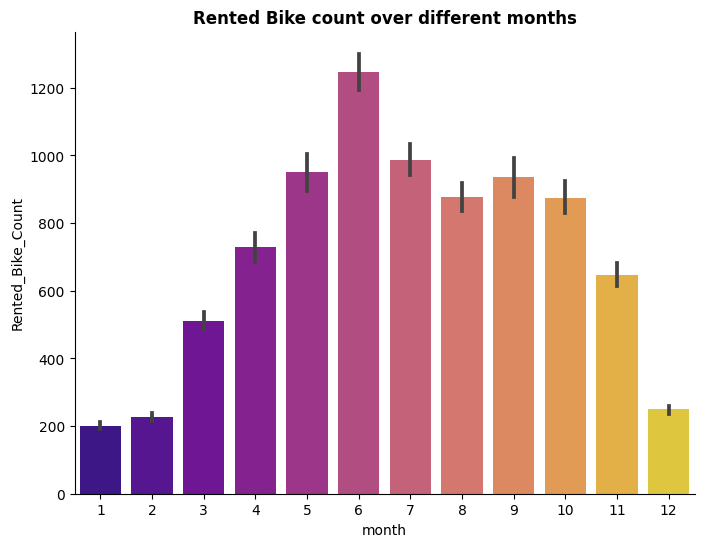

In [32]:
# Bike Count Over Months
plt.figure(figsize=(8,6))
plt.title('Rented Bike count over different months', fontweight = 'bold')
sns.barplot(data = Bike_df, x='month', y = 'Rented_Bike_Count', palette ='plasma')
sns.despine()
plt.xticks(rotation='horizontal')
plt.show()

* From the above bar plot we can clearly say that in month of June(6), there is high demand for rental bikes.
* The least demand of rented bikes is seen in the months of January and February.

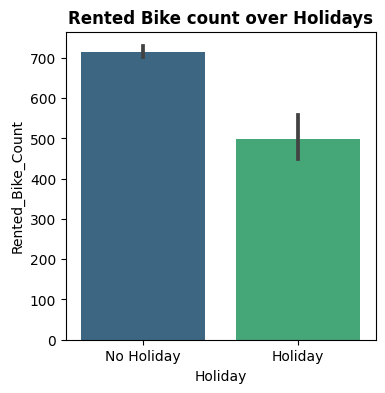

In [33]:
# Bike Count Over Holidays
plt.figure(figsize=(4,4))
plt.title('Rented Bike count over Holidays',fontweight = 'bold')
sns.barplot(data = Bike_df, x='Holiday', y = 'Rented_Bike_Count', palette ='viridis')
plt.show()

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

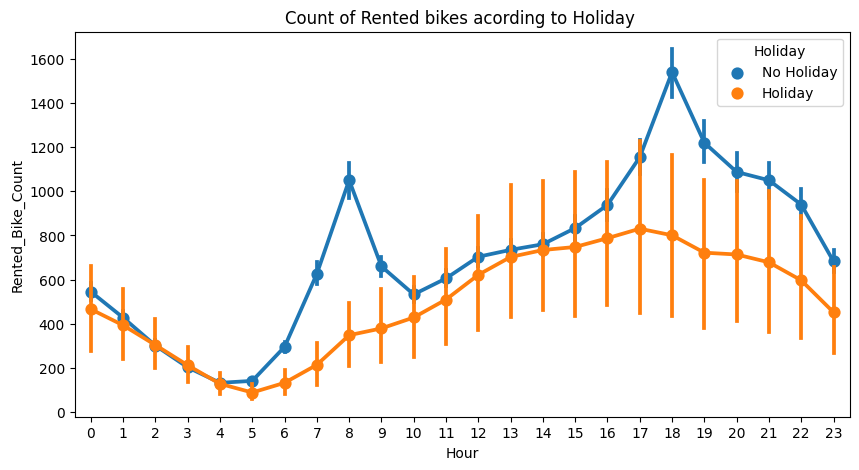

In [34]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.pointplot(data=Bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

* ***In the above bar plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that,***
* *** shows that in holiday people uses the rented bike from 2pm-8pm***

##2. Bivariate Analysis

Text(0.5, 1.0, 'Relation between Temperature and Rental Bike Count')

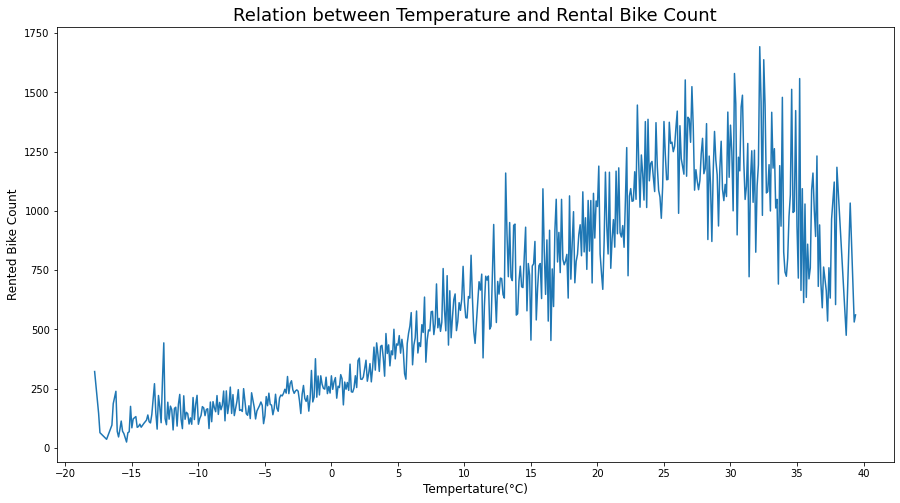

In [ ]:
df_t=df.groupby('Temperature(°C)').agg({'Rented_Bike_Count':'mean'}).reset_index()
plt.rcParams['figure.figsize'] = 15,8
sns.lineplot(df_t['Temperature(°C)'],df_t['Rented_Bike_Count'])
plt.xticks(np.arange(-20, 45, 5))
plt.xlabel('Tempertature(°C)',fontsize=12)
plt.ylabel('Rented_bike_Count',fontsize=12)
plt.title('Relation between Temperature and Rental Bike Count',fontsize=18)

* According to the line chart, highest demand for the rented bike is seen when there is moderate temperature that is around 25°C to 35°C.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

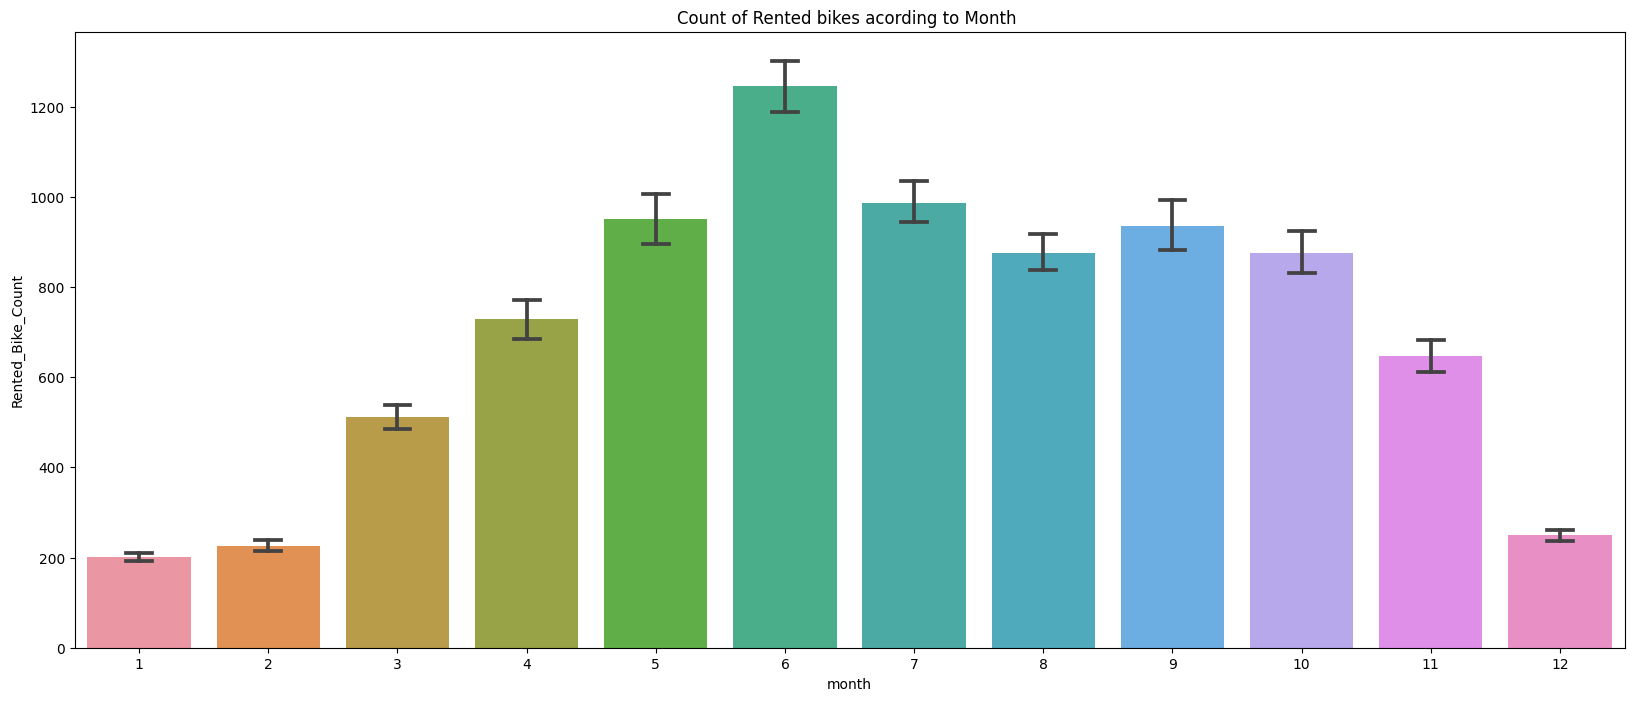

In [36]:
#MONTH
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=Bike_df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

* From the above bar plot we can clearly say that in month of June, there is high demand for rental bikes.
* The least demand of rented bikes is seen in the months of January and February.

[Text(0.5, 1.0, 'Count of Rented bikes per Hour of a day')]

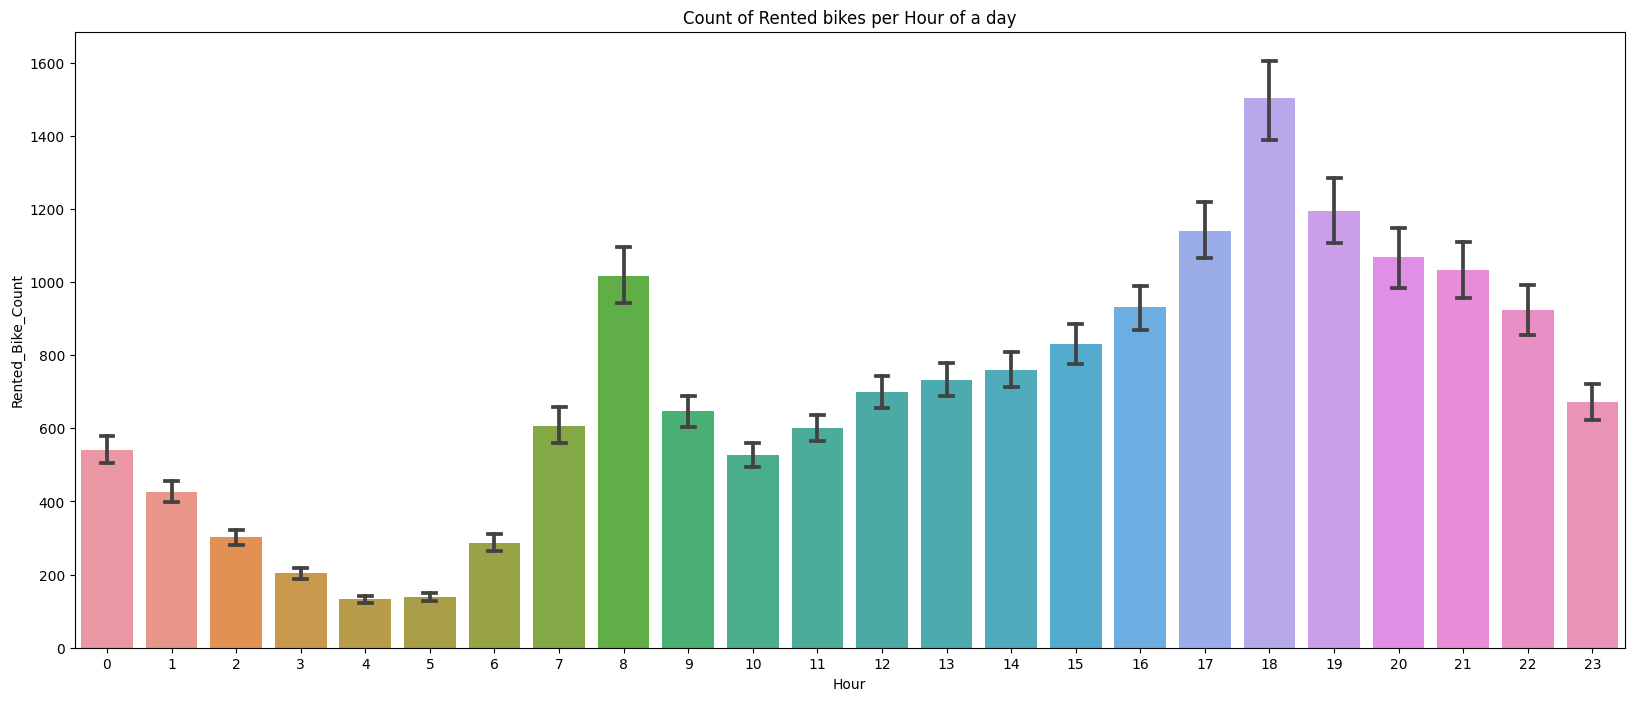

In [37]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=Bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes per Hour of a day')

* In the above plot , it can be seen that generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.